Creating a WordCloud

In [3]:
# load libraries
import numpy as np
import pandas as pd
import os

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

In [4]:
os.chdir("/content/drive/MyDrive/Colab Notebooks/WordCloud")
!ls

'Copy of Creating a Word Cloud Class with Python.ipynb'
 Coronavirus-CDC.jpg
'Coronavirus Review.pdf'
'Creating a Word Cloud with Python.ipynb'
 virus_wordcloud.png


In [ ]:
#!pip install PyMuPDF

In [5]:
import fitz

# Open pdf file and extract text
with fitz.open("Coronavirus Review.pdf") as f:
  text = ""
  for page in f:
    text += page.getText()

In [6]:
# Create list of stopwords
stopwords = set(STOPWORDS)
stopwords.update(["et", "al", "Journal", "Epub", "print"])

In [7]:
# Select image to be used as mask
mask = np.array(Image.open("Coronavirus-CDC.jpg"))

In [8]:
# Generate wordcloud
wordcloud_virus = WordCloud(stopwords=stopwords, mask=mask, background_color="white", mode="RGBA", max_words=150).generate(text)

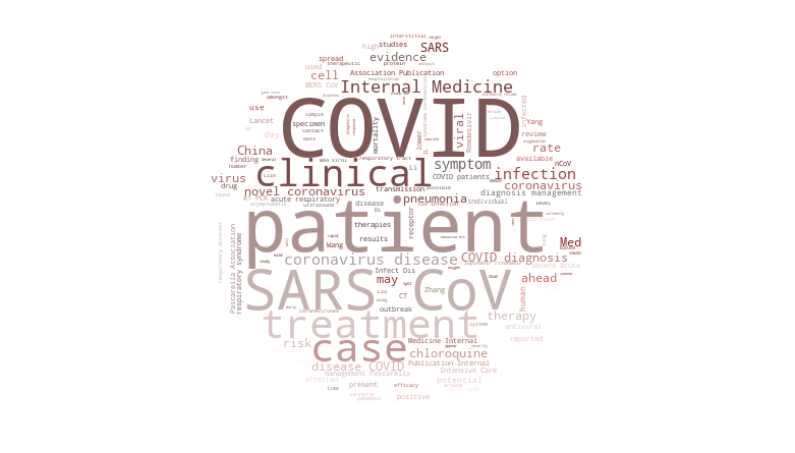

In [9]:
# Recolor, save, and show image
image_colors = ImageColorGenerator(mask)

plt.figure(figsize=[14,14])
plt.imshow(wordcloud_virus.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.savefig("virus_wordcloud.png", format="png")
plt.show()